In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
excelfile=pd.ExcelFile("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx")

df_left=pd.read_excel(excelfile,'Employees who have left')  
df_notleft=pd.read_excel(excelfile,'Existing employees')    

In [4]:
df_left.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [5]:
df_notleft.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [6]:
# Combining the IT, support and Technical in one value as Technical

df_left['dept']=np.where(df_left['dept']=='support','technical',df_left['dept']).astype('str')
df_left['dept']=np.where(df_left['dept']=='IT','technical',df_left['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='support','technical',df_notleft['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='IT','technical',df_notleft['dept']).astype('str')

**DATA VISUALIZATION**

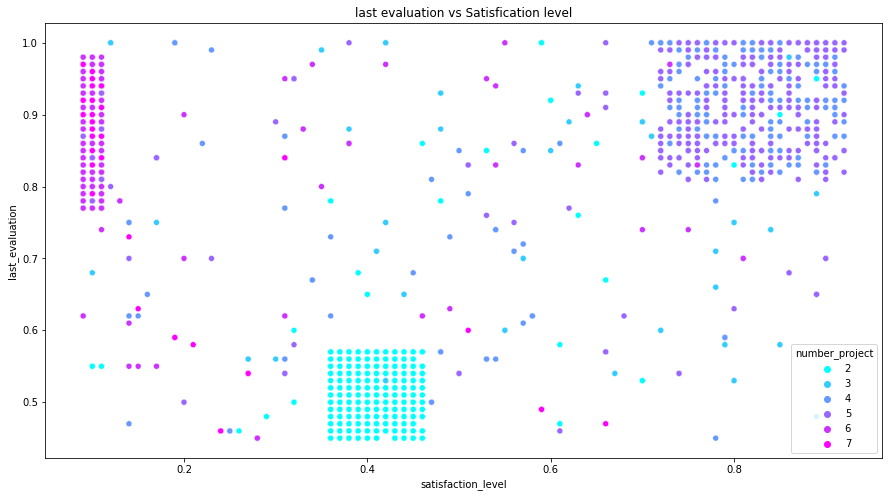

In [7]:
plt.figure(figsize=(15,8))
plt.title("last evaluation vs Satisfication level")
sns.scatterplot(x=df_left['satisfaction_level'],y=df_left['last_evaluation'],hue='number_project',data=df_left, palette='cool')
plt.show()

Observation:

Satisfcation level is very low for employees who has number of projects more than 4 <br>
Last evaluation for employees having number of projects 2 is low, also they have low satification level.

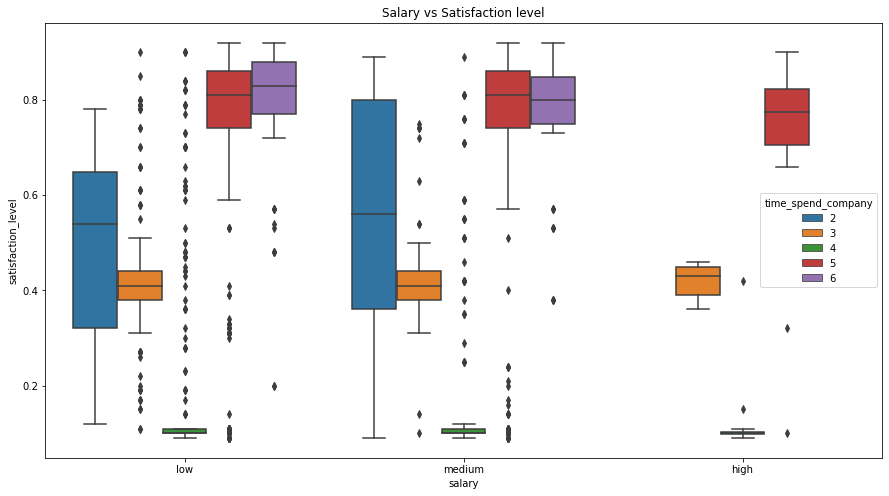

In [8]:
plt.figure(figsize=(15,8))
plt.title('Salary vs Satisfaction level')
sns.boxplot(x=df_left['salary'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()

Observation : 
Satisfcation level is very low for employees who spent time in the company equal to 4 for all levels of salary. <br>
For low salary employees, most of the employees belong to the 2nd quartile with less satisfaction levels as we can see the median is shifted to the upper quartile. <br>
We can see there are so many oultiers from each salary levels.<br>
The box plot is bigger for meduim salary emplyoees who spent time in the company is equal to 2, 50% of these employees have low satifaction levels.

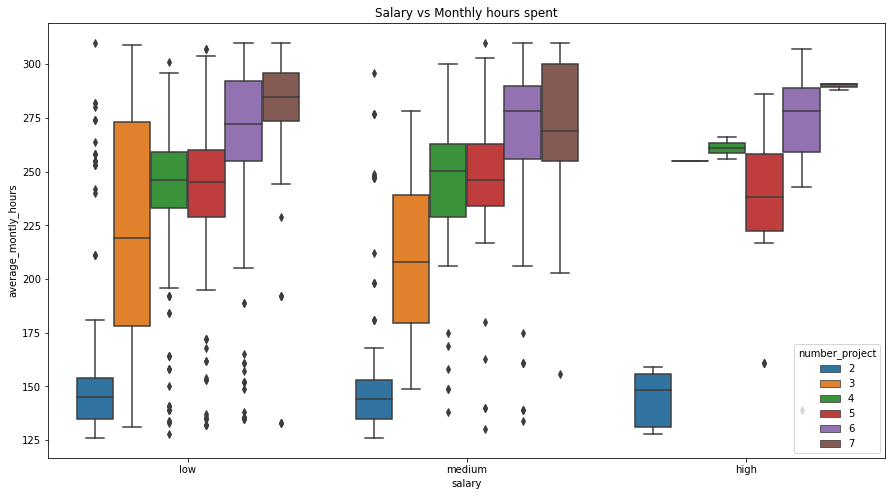

In [9]:
plt.figure(figsize=(15,8))
plt.title("Salary vs Monthly hours spent")
sns.boxplot(x=df_left['salary'],y=df_left['average_montly_hours'],hue='number_project',data=df_left)
plt.show()

Observation:

Avereage monlthy hours is very low for employees who has number of projects equal to 2 for all levels of salary. <br>
As we can see from the plot the employees from all levels for salary are loaded with projets and monthly hours is high. <br>
We can see there are so many oultiers from low and meduim salary levels. <br>
The box plot is bigger for low salary emplyoees who has number of projects equal to 3, 50% of these employees high monthly hours. <br>

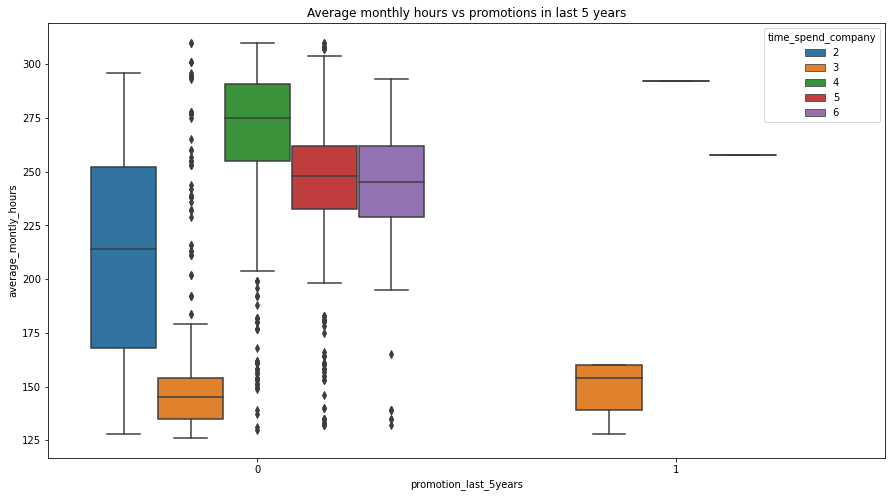

In [10]:
plt.figure(figsize=(15,8))
plt.title("Average monthly hours vs promotions in last 5 years")
sns.boxplot(x=df_left['promotion_last_5years'],y=df_left['average_montly_hours'],hue='time_spend_company',data=df_left)
plt.show()

Observations : 
    
Employees who got promotion in last 5 years have less average monthly hours, that to who has spend exactly 3 years in the company. <br>
Very few employees from higher duration time spend in the comapny got promotion. <br>
The employees who has not got the promotion are having higher avrage monthly hours and mostly time spend in the comapny is more than or equal 4 years with few outliers.

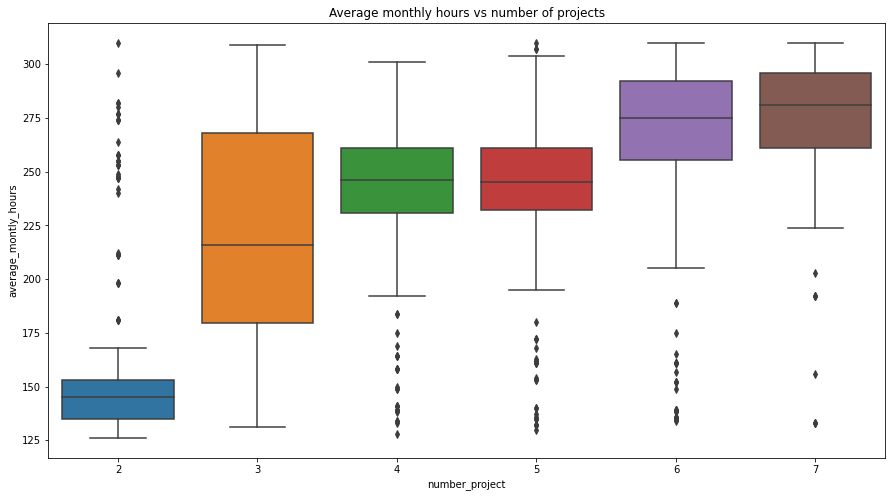

In [11]:
plt.figure(figsize=(15,8))
plt.title('Average monthly hours vs number of projects')
sns.boxplot(x=df_left['number_project'],y=df_left['average_montly_hours'],data=df_left)
plt.show()

Observation :

From the above plot, As the number of projects goes higher average monthly hours goes high as well. Most fo the employees belong to the project number equal to 3 as it has bigger boxplot than others

<Figure size 1080x720 with 0 Axes>

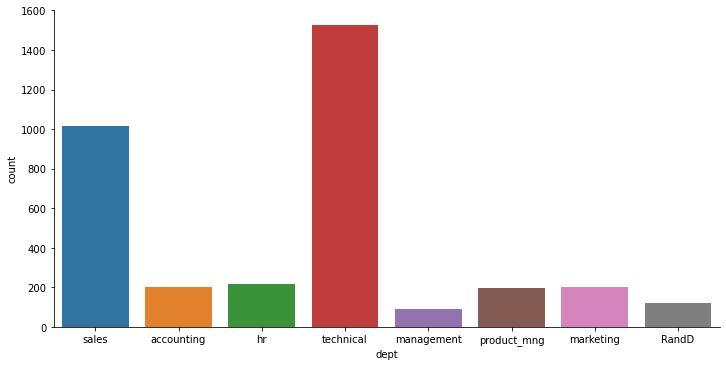

In [12]:
plt.figure(figsize=(15,10))
sns.catplot('dept',data=df_left,kind='count',aspect=2)
plt.show()

Observation :

Most of the employees leaving the company belongs to Sales and Technical departments

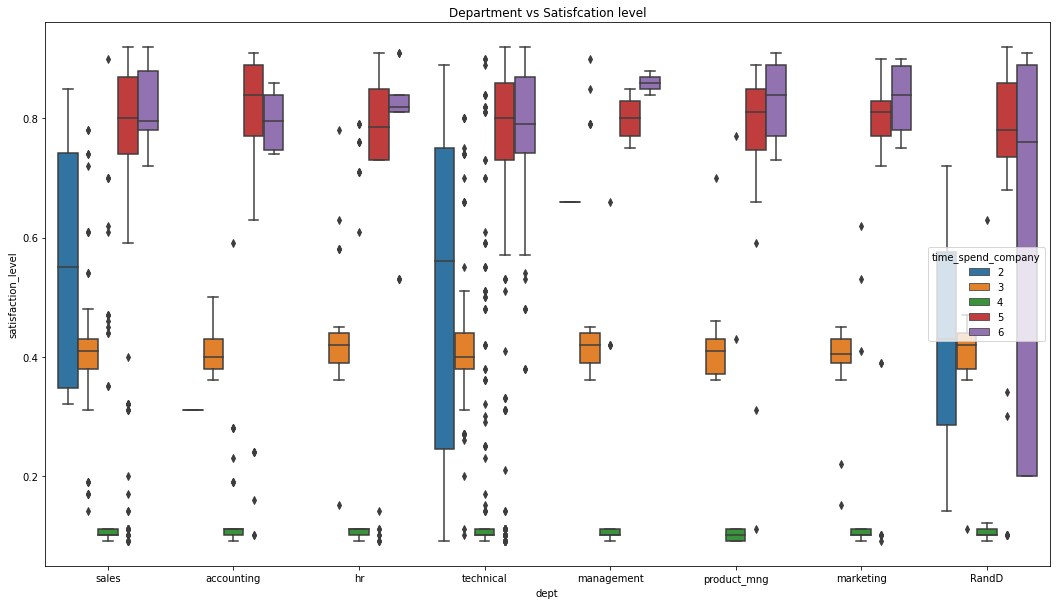

In [13]:
plt.figure(figsize=(18,10))
plt.title("Department vs Satisfcation level")
sns.boxplot(x=df_left['dept'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()


Observation :

Employees from R&D department having 6 years of time spend having large distribution of satisfaction levels. <br>
Time spend equal to 4 in all departments are having same level of very low satisfaction levels same goes for time spend equals to 3 having same level of average satisfcations in all departments. <br>
Employees from sales and Technical department of 2 yeras of time spend is also having larger distributions of satisfaction levels as expected.

Conclusion :
    
Employees who are stressed up working more hours and having higher number of projects. <br>
Mostly from sales and technical department were leaving the company. <br>
And, the employees are not getting promotion even they are working tirelessly.

## Data transformation

In [14]:
#Combining data
df_left['Left']=1

df_notleft['Left']=0

final_df=pd.concat([df_left,df_notleft],axis=0)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [16]:
# Creating dummies

columns=['dept','salary']

dummies=pd.get_dummies(final_df[columns],drop_first=True)

final_df=pd.concat([final_df,dummies],axis=1)

final_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
0,1,0.38,0.53,2,157,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1,0,0,0,0,0,1,0,0,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1,0,0,0,0,0,1,0,0,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1,0,0,0,0,0,1,0,1,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0


In [17]:
final_df=final_df.drop(columns,axis=1)  # Dropping uncessary columns

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Left                   14999 non-null  int64  
 9   dept_accounting        14999 non-null  uint8  
 10  dept_hr                14999 non-null  uint8  
 11  dept_management        14999 non-null  uint8  
 12  dept_marketing         14999 non-null  uint8  
 13  dept_product_mng       14999 non-null  uint8  
 14  dept_sales             14999 non-null  uint8  
 15  de

## Model Selection and Evaluation

In [18]:
# Dividing the dataset into X and Y 

X=final_df.drop(['Emp ID','Left'],axis=1)

y=final_df['Left']

In [19]:
print("The proportion of employees left is {}% from total dataset".format(round(final_df.Left.value_counts()[1]/len(final_df)*100,2)))

The proportion of employees left is 23.81% from total dataset


In [20]:
# Splitting the X and y into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Creating a model using logistic regression

In [21]:
# Logisstic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model=LogisticRegression()
logreg=RFE(model,15)
logreg.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [22]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,logreg.predict(X_test))))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,logreg.predict(X_test))))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,logreg.predict(X_test))))

The Accuracy score using logistic regression is:0.789
The Precison score using logistic regression is:0.625
The Recall score using logistic regression is:0.352
The F1 score using logistic regression is:0.450


### Creating a model using Random forest

In [23]:
# Random forest cloassifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [24]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,rfc.predict(X_test))))
print("The Precison score using Random Forest Classifier is:{:.3f}".format(precision_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(recall_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(f1_score(y_test,rfc.predict(X_test))))

The Accuracy score using Random Forest Classifier is:0.992
The Precison score using Random Forest Classifier is:0.995
The Recall score using Random Forest Classifier is:0.971
The Recall score using Random Forest Classifier is:0.983


## Resampling <br>
### Oversampling

We are doing oversampling because we saw that the dataset is imbalance, we have about 24% of dataset who left the organization and the remaining are yet to discover. Hence to resolve this issue we need to come up with some technique like oversampling.

In [25]:
# Oversamlpling

from sklearn.utils import resample

y = final_df['Left']
X= final_df.drop(['Left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=50)

X=pd.concat([X_train,y_train],axis=1)

emp_not_left=X[X.Left==0]
emp_left=X[X.Left==1]

In [26]:
# unsampling the minority by adding dummy rows to the left equal to 1 

left_upsampled= resample(emp_left,replace=True,n_samples=len(emp_not_left),random_state=50)

left_upsampled=pd.concat([emp_not_left,left_upsampled])

left_upsampled.Left.value_counts()  # Both classes now having equal samples

1    8573
0    8573
Name: Left, dtype: int64

In [27]:
# Preparing for X train and Y train dataset

y_train=left_upsampled.Left
X_train=left_upsampled.drop('Left',axis=1)

###  Logistic regression

In [28]:
# Model building

new_logreg=LogisticRegression()
logreg_rfe=RFE(new_logreg,15)
logreg_rfe.fit(X_train.drop('Emp ID',axis=1),y_train)
upsampled_pred=logreg_rfe.predict(X_test.drop('Emp ID',axis=1))

In [29]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,upsampled_pred)))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,upsampled_pred)))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,upsampled_pred)))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,upsampled_pred)))

The Accuracy score using logistic regression is:0.757
The Precison score using logistic regression is:0.495
The Recall score using logistic regression is:0.796
The F1 score using logistic regression is:0.610


### Random Forest

In [30]:
# Model building

rfc_upsampled=RandomForestClassifier()
rfc_upsampled.fit(X_train.drop('Emp ID',axis=1),y_train)
upsampled_rfc_pred=rfc_upsampled.predict(X_test.drop('Emp ID',axis=1))

In [31]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,upsampled_rfc_pred)))
print("The Precison score using Random Forest Classifier is:{:.3f}".format(precision_score(y_test,upsampled_rfc_pred)))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(recall_score(y_test,upsampled_rfc_pred)))
print("The F1 score using Random Forest Classifier is:{:.3f}".format(f1_score(y_test,upsampled_rfc_pred)))

The Accuracy score using Random Forest Classifier is:0.988
The Precison score using Random Forest Classifier is:0.995
The Recall score using Random Forest Classifier is:0.954
The F1 score using Random Forest Classifier is:0.974


We can conclude now from the above all models we use random forest algorithm as it gives us better Accuracy and F1 score than other algorithms.

## Fold Grid Search Cross Validation

In [34]:
# Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

rfc=RandomForestClassifier(random_state=50)

n_folds=KFold(n_splits=5,shuffle=True, random_state=50)

parameters={'criterion':['gini','entropy'],'max_depth': range(5,30,5),'max_features': range(10,18,2),
            'min_samples_split': range(2,10,2)}

model_cv = GridSearchCV(estimator=rfc,param_grid=parameters,cv=n_folds,verbose=1,
                        return_train_score=True,scoring='recall')

In [35]:
model_cv.fit(X_train.drop('Emp ID',axis=1),y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 31.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 5),
                         'max_features': range(10, 18, 2),
                         'min_samples_split': range(2, 10, 2)},
             return_train_score=True, scoring='recall', verbose=1)

In [36]:
model_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 12,
 'min_samples_split': 2}

In [37]:

model_cv.best_score_

0.9979125180780448

In [38]:
final_rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features=14,min_samples_split=2,random_state=50)
final_rfc.fit(X_train.drop('Emp ID',axis=1),y_train)
y_pred=final_rfc.predict(X_test.drop('Emp ID',axis=1))

## Model Evaluation

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2855
           1       0.99      0.96      0.98       895

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



In [40]:
final_rfc.feature_importances_

array([0.37628363, 0.12143093, 0.09250454, 0.10835924, 0.27465495,
       0.00318415, 0.00067213, 0.00066982, 0.00249705, 0.00119224,
       0.00069619, 0.00064667, 0.00433271, 0.00436801, 0.00550888,
       0.00299887])

In [41]:
X_train.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_technical', 'salary_low', 'salary_medium'],
      dtype='object')

### Feature Importance

In [42]:
features=np.array(X_train.drop('Emp ID',axis=1).columns)
important=final_rfc.feature_importances_
indexes_features=important.argsort()
for i in indexes_features:
    print("{} : {:.2f}%".format(features[i],important[i]*100))

dept_product_mng : 0.06%
dept_accounting : 0.07%
promotion_last_5years : 0.07%
dept_marketing : 0.07%
dept_management : 0.12%
dept_hr : 0.25%
salary_medium : 0.30%
Work_accident : 0.32%
dept_sales : 0.43%
dept_technical : 0.44%
salary_low : 0.55%
number_project : 9.25%
average_montly_hours : 10.84%
last_evaluation : 12.14%
time_spend_company : 27.47%
satisfaction_level : 37.63%


In [43]:
# Finding employees who are prone to leave

y_test1=pd.concat([y_test,X_test['Emp ID']],axis=1)
y_test3=pd.DataFrame(y_pred)

y_test3.reset_index(inplace=True, drop=True)

gf=pd.concat([y_test1.reset_index(),y_test3],1)

new_df=gf[gf.Left==0]

new_df=new_df.drop('index',axis=1)

new_df.columns=['Left','Emp ID','Predicted_left']

Employees_prone_to_leave=new_df[new_df['Predicted_left']==1]
Employees_prone_to_leave=Employees_prone_to_leave.reset_index()
Employees_prone_to_leave=Employees_prone_to_leave.drop(['Left','Predicted_left','index'],axis=1)

In [44]:
Employees_prone_to_leave

,Emp ID
0,6467
1,2416
2,9176
3,9241
4,5200
5,9057
6,2802
7,3862
8,4770
